# MNIST 손글씨
## DNN

In [105]:
import numpy  as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [107]:
# 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [108]:
from tensorflow.keras.utils import to_categorical

x_train = train_images / 255.0
x_test = test_images / 255.0
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [109]:
x_train.shape

(60000, 28, 28)

In [110]:
y_train.shape

(60000, 10)

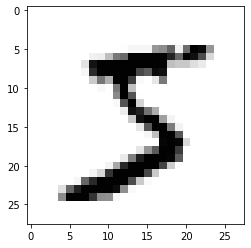

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [11]:
class_names = ['0', '1', '2', '3', '4', '5',
               '6', '7', '8', '9']

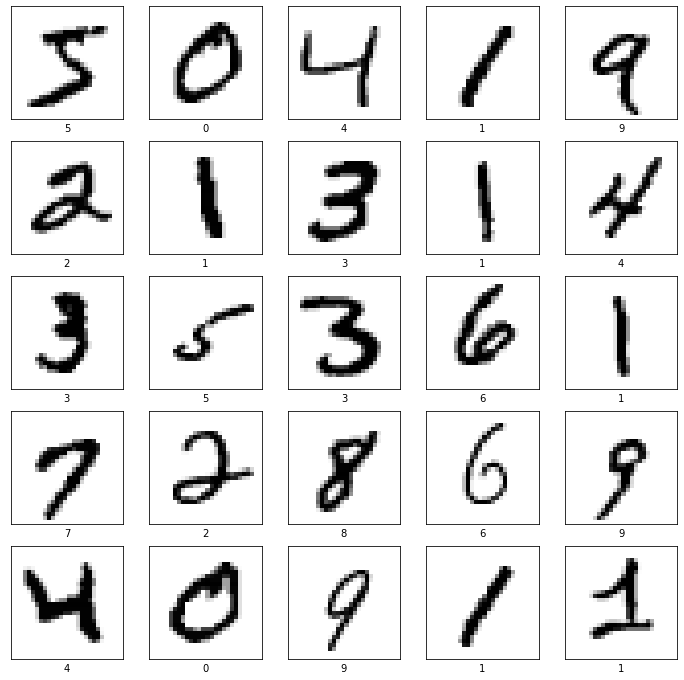

In [12]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [39]:
model1 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

In [40]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy']) # 원핫인코딩이 되어 있으면 sparse_categori... 안 함

In [45]:
model1.fit(x_train, y_train, epochs=50, batch_size=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 22us/sample - loss: 9.5222e-04 - accuracy: 0.9997
Epoch 2/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.5713e-04 - accuracy: 0.9999
Epoch 3/50
60000/60000 [==============================] - 1s 22us/sample - loss: 5.0349e-04 - accuracy: 0.9998
Epoch 4/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0025 - accuracy: 0.9991
Epoch 5/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0016 - accuracy: 0.9995
Epoch 6/50
60000/60000 [==============================] - 1s 23us/sample - loss: 3.1994e-04 - accuracy: 0.9999
Epoch 7/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.4779e-05 - accuracy: 1.0000
Epoch 8/50
60000/60000 [==============================] - 1s 23us/sample - loss: 4.6123e-06 - accuracy: 1.0000
Epoch 9/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.9571e-06 - acc

In [46]:
test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.2064 - accuracy: 0.9806

테스트 정확도: 0.9806


## CNN

In [93]:
(x_train, train_labels), (x_test, test_labels) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [94]:
x_train.shape

(60000, 28, 28, 1)

In [95]:
y_train.shape

(60000, 10)

In [96]:
# 컨볼루션 신경망 설정

model = Sequential([Conv2D(32, kernel_size=(1,1), input_shape=(28,28,1), activation='relu'),
                   Conv2D(64, (3, 3), activation='relu'), MaxPooling2D(pool_size=2),
                   Dropout(0.25), Flatten(), Dense(128, activation='relu'),
                   Dropout(0.5), Dense(10, activation='softmax')])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        64        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

In [97]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
# 모델 최적화 설정
MODEL_DIR = './model1/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

In [99]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [100]:
# 모델의 실행
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=30, batch_size=20,
                   callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2220 - accuracy: 0.9326 - val_loss: 0.0671 - val_accuracy: 0.9790

Epoch 00001: val_loss improved from inf to 0.06709, saving model to ./model1/mnist-cnn-01-0.0671.hdf5
Epoch 2/30
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1073 - accuracy: 0.9682 - val_loss: 0.0503 - val_accuracy: 0.9840

Epoch 00002: val_loss improved from 0.06709 to 0.05026, saving model to ./model1/mnist-cnn-02-0.0503.hdf5
Epoch 3/30
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0849 - accuracy: 0.9743 - val_loss: 0.0490 - val_accuracy: 0.9835

Epoch 00003: val_loss improved from 0.05026 to 0.04900, saving model to ./model1/mnist-cnn-03-0.0490.hdf5
Epoch 4/30
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0450 - val_accuracy: 0.9863

Epoch 00004: val_loss improved from 0.04900 

In [101]:
from keras.models import load_model
del model
model = load_model('model1/mnist-cnn-16-0.0410.hdf5')

In [102]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy : 0.9902
